### set folder_name and `num_trials`
- `num_trials` and `threshold_shift` based on preprocessing alignment (see PreprocessLeverData notebooks) and can be found for each day's session in the Google sheets analysis log

In [1]:
name = 'ANM7'
session = '20240201_d3'
num_trials = 129
threshold_shift = 0.0

In [2]:
hit_trials_to_exclude = []

### imports:

In [3]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import scipy.interpolate as interpolate
import pickle
import glob # find files in a directory
import re # regex for string parsing

from common.set_matplotlib_settings import set_matplotlib_settings
from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.select_trials import select_hit_trials
from common.select_trials import save_custom_hit_trials
from common.select_trials import select_custom_hit_trials
from hit_movements.get_movement_thresholds import get_movement_thresholds
from hit_movements.extract_leverpresses import extract_leverpresses
from common.extract_movement_intervals import extract_movement_intervals

### Setup folders and matfiles

In [4]:
tone_discriminiation_matfile = '../Data_Copy/ToneDiscriminationData/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, arduino, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)

PreprocessLeverData_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
output_folder = "../Data_Copy/AnalysisData/"+name+"/HitMovements_"+name+"_"+session+"/"
!mkdir {output_folder}

respMTX shape: (130, 7)
MTXTrialType shape: (1000, 5)
number of trials: 130


### find all movements from trials that meet all thresholds

select all hit trials for consideration

In [5]:
hit_trials = select_hit_trials(respMTX, num_trials)
save_custom_hit_trials(output_folder, hit_trials)

50  hit trials in this session.


delete trials as necessary and resave

In [6]:
for trial_index in hit_trials_to_exclude:
    hit_trials.remove(trial_index)
save_custom_hit_trials(output_folder, hit_trials)
hit_trials = select_custom_hit_trials(output_folder)

50  hit trials in this session.


_in LeverData voltage_

In [7]:
movement_baseline, movement_threshold, no_movement_threshold = get_movement_thresholds(params, respMTX, threshold_shift)

movement_baseline for all trials should be the same:  1.8146627565982405
mvt threshold:  0.25 + movement_baseline =  2.0646627565982403
nomvt threshold:  0.15 + movement_baseline =  1.9646627565982404


`leverpress_informations`: each selected trial has a row

columns are `trial_index` |  `leverpress_left_index` sample when leverpress starts | `leverpress_right_index` sample when leverpress ends

In [8]:
hit_leverpress_informations = extract_leverpresses(hit_trials, PreprocessLeverData_folder, \
                                              movement_baseline, movement_threshold, no_movement_threshold,\
                                                output_folder)

Checking trial  0 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.06471976332552
finding right threshold...
met
finding left threshold...
met
Checking trial  5 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.0656647275594335
finding right threshold...
met
finding left threshold...
met
Checking trial  8 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.0647247570421277
finding right threshold...
met
finding left threshold...
met
Checking trial  13 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  14 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.0647728644917485
finding right threshold...
met
finding left threshold...
met
Checking trial  17 ...
leverpress detection was at be

leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.0647088533889955
finding right threshold...
met
finding left threshold...
met
Checking trial  70 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.0650805055096617
finding right threshold...
met
finding left threshold...
met
Checking trial  74 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.065022229165093
finding right threshold...
met
finding left threshold...
met
Checking trial  76 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.06585763109683
finding right threshold...
met
finding left threshold...
met
Checking trial  80 ...
leverpress detection was at below first threshold, try moving leverpress index up...
new leverpress index value:  2.0650319450050016
fi

### Save movements from `movements` into separate "movement_trial#" .npy files
`movement`: first row is times, second row is leverdata

Movements will have MVT0 subtracted off and be temporally aligned to be comparable

In [9]:
hit_movements = extract_movement_intervals(hit_leverpress_informations, \
                                           'processed', PreprocessLeverData_folder, PreprocessLeverData_folder, output_folder, \
                                            movement_baseline)

check by plotting movements that are MVT0 subtracted and temporally aligned:

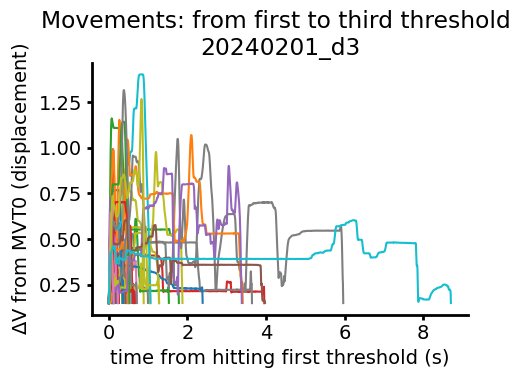

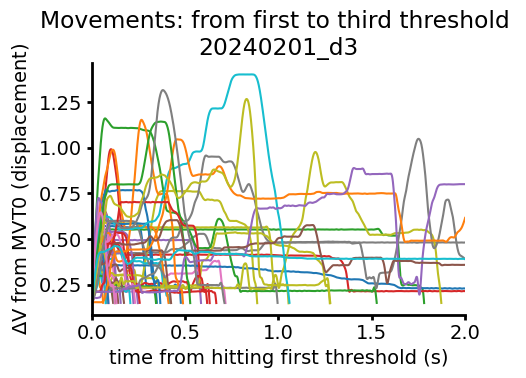

In [10]:
set_matplotlib_settings()

for hit_movement in hit_movements:
    # also check by plotting all of the movements
    plt.plot(hit_movement[0, :], hit_movement[1, :])
plt.title("Movements: from first to third threshold \n"+session)
plt.xlabel("time from hitting first threshold (s)")
plt.ylabel("$\Delta$V from MVT0 (displacement)")

plt.savefig(output_folder+"plot_movements.png")
plt.show()

for hit_movement in hit_movements:
    # also check by plotting all of the movements
    plt.plot(hit_movement[0, :], hit_movement[1, :])
plt.title("Movements: from first to third threshold \n"+session)
plt.xlabel("time from hitting first threshold (s)")
plt.ylabel("$\Delta$V from MVT0 (displacement)")
plt.xlim([0, 2])
plt.show()